###Stable Diffusion Models:
Stable Diffusion Models leverage the “Latent Diffusion” technique to generate images from noise by progressively denoising it, guided by a text prompt and a frozen CLIP text encoder. This approach employs a lightweight architecture with a UNet backbone and CLIP encoder, enabling efficient GPU-powered image generation. The model’s focus on latent space reduces memory consumption, allowing for diverse artistic expression by translating textual descriptions into photorealistic and imaginative visuals.

There are mainly three main components in latent diffusion:
- A text-encoder, e.g. CLIP’s Text Encoder
- A U-Net
- An autoencoder (VAE)



-  The Autoencoder (VAE): The Variational Autoencoder (VAE) model consists of two main components: an encoder and a decoder. During latent diffusion training, the encoder transforms a 512x512x3 image into a lower-dimensional latent representation, typically sized 64x64x4, for the forward diffusion process. These smaller encoded versions of images are referred to as latents. Throughout the training, increasing amounts of noise are applied to these latents at each step. This noisy, encoded latent representation of the images is then used as the input to the U-Net model.The decoder's role is to convert the latent representation back into an image. Specifically, it takes the denoised latents generated by the reverse diffusion process and transforms them into the final images. During inference, only the VAE decoder is needed to convert the denoised latent representations into actual images, making the process efficient and less resource-intensive.

- UNet: The U-Net predicts denoised image representation of noisy latents. Here, noisy latents act as input to Unet and the output of UNet is noise in the latents.

- The Text Encoder: The text encoder transforms an input prompt into an embedding space, which serves as input for the U-Net model. This embedding acts as guidance for the noisy latents during the U-Net's denoising process. Typically, the text encoder is a transformer-based model that maps a sequence of input tokens to a sequence of latent text embeddings. Instead of training a new text encoder, Stable Diffusion uses a pre-trained text encoder, CLIP. The CLIP text encoder generates embeddings that correspond to the input text, providing a robust foundation for guiding the image generation process.

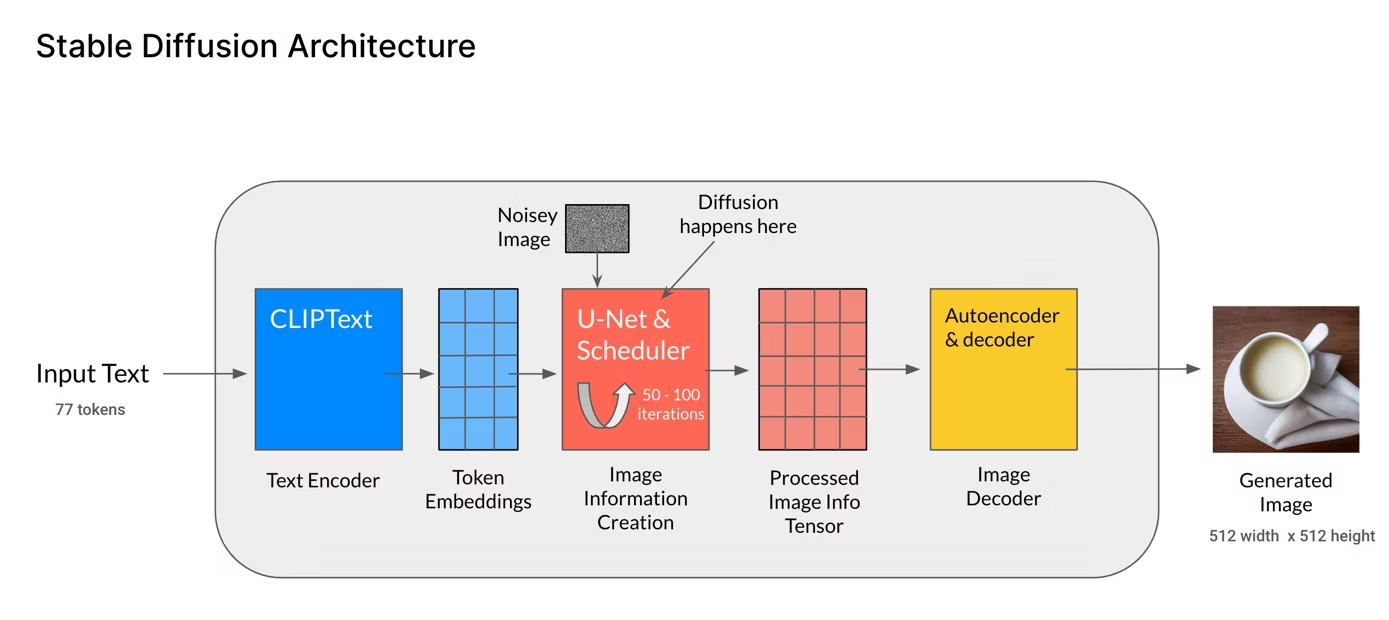

In [1]:
!pip install --upgrade diffusers transformers scipy

  Obtaining dependency information for diffusers from https://files.pythonhosted.org/packages/2f/ee/f67b0888229be96a276257579a58eb2331733d246fdb8620e09ca7253971/diffusers-0.30.2-py3-none-any.whl.metadata
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/ed/05/7f03e680cc5249c4f96c9e4e845acde08eb1aee5bc216eff8a089baa4ddb/scipy-1.14.1-cp311-cp311-macosx_14_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 21.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.1
    Uninstalling scipy-1.11.1:
      Successfully uninstalled scipy-1.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ge

In [3]:
import torch
from diffusers import StableDiffusionPipeline
from IPython.display import display

# Function to load the model
def load_model(model_id="CompVis/stable-diffusion-v1-4", device="cpu"):
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe = pipe.to(device)
    return pipe

#  generate image from a prompt
def generate_image(pipe, prompt):
    image = pipe(prompt).images[0]
    display(image)


pipe = load_model()


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, du

In [4]:
# Example 1
prompt = "Two squirrels having strawberry on the bank of a river"
generate_image(pipe, prompt)

RuntimeError: "LayerNormKernelImpl" not implemented for 'Half'

In [5]:
# Example 2
prompt = "A serene beach with bioluminescent waves under a dark night sky"
generate_image(pipe, prompt)

RuntimeError: "LayerNormKernelImpl" not implemented for 'Half'